In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Reading

In [4]:
df = pd.read_csv('cars.csv')
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [5]:
df['Car'].nunique()

17

In [6]:
df['Model'].nunique()

35

## Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
df['Car']  = le.fit_transform(df['Car'])
df['Model'] = le.fit_transform(df['Model'])

In [9]:
df.head()

,Car,Model,Volume,Weight,CO2
0,14,10,1000,790,99
1,10,29,1200,1160,95
2,12,14,1000,929,95
3,2,4,900,865,90
4,9,16,1500,1140,105


## Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()

In [12]:
ss.fit(df.drop('CO2',axis = 1))

StandardScaler()

In [13]:
df_scale = ss.transform(df.drop('CO2',axis = 1))

In [14]:
df_scaled = pd.DataFrame(df_scale,columns = df.columns[:-1])

In [15]:
df_scaled.head()

,Car,Model,Volume,Weight
0,1.274187,-0.708128,-1.593366,-2.103893
1,0.483312,1.198800,-1.071901,-0.554072
2,0.878750,-0.306670,-1.593366,-1.521663
3,-1.098437,-1.310316,-1.854099,-1.789740
4,0.285594,-0.105940,-0.289703,-0.637846


In [16]:
df.shape

(36, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Car     36 non-null     int32
 1   Model   36 non-null     int32
 2   Volume  36 non-null     int64
 3   Weight  36 non-null     int64
 4   CO2     36 non-null     int64
dtypes: int32(2), int64(3)
memory usage: 1.2 KB


In [18]:
df.describe()

,Car,Model,Volume,Weight,CO2
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,7.555556,17.055556,1611.111111,1292.277778,102.027778
std,5.129436,10.105004,388.975047,242.123889,7.454571
min,0.000000,0.000000,900.000000,790.000000,90.000000
25%,3.000000,8.750000,1475.000000,1117.250000,97.750000
50%,8.000000,17.500000,1600.000000,1329.000000,99.000000
75%,12.000000,25.250000,2000.000000,1418.250000,105.000000
max,16.000000,34.000000,2500.000000,1746.000000,120.000000


## Data Cleaning

In [32]:
df.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

<AxesSubplot:>

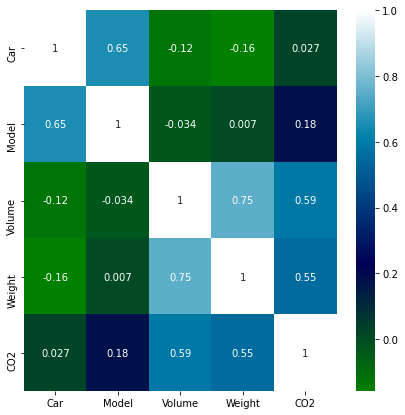

In [19]:
plt.figure(figsize = (7,7))
sns.heatmap(df.corr(),annot = True,cmap = 'ocean')

## Data Visualization

C:\Users\aadit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Car', ylabel='count'>

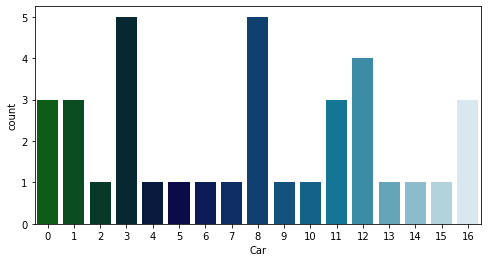

In [20]:
plt.figure(figsize = (8,4))
sns.countplot(df['Car'],palette = 'ocean')

C:\Users\aadit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='count'>

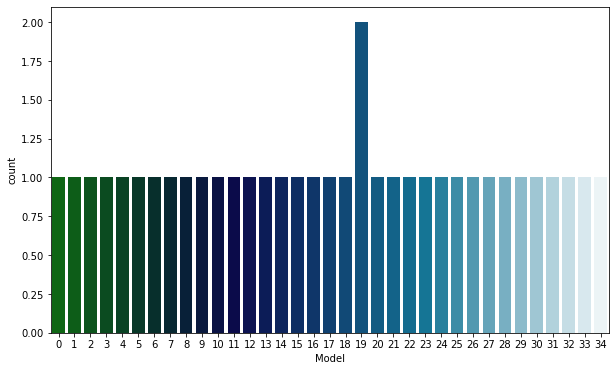

In [21]:
plt.figure(figsize = (10,6))
sns.countplot(df['Model'],palette = 'ocean')

<AxesSubplot:xlabel='CO2', ylabel='Volume'>

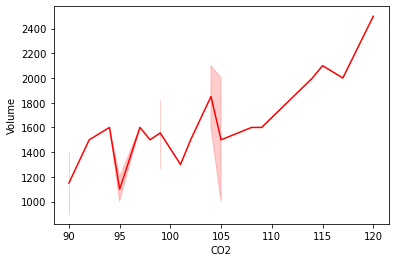

In [22]:
sns.lineplot(x = 'CO2',y = 'Volume',data = df,linestyle = '-',color = 'red')

<AxesSubplot:xlabel='CO2', ylabel='Weight'>

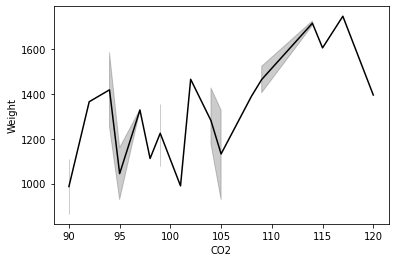

In [23]:
sns.lineplot(x = 'CO2',y = 'Weight',data = df,color = 'black')

## Model

In [24]:
X = df_scaled
y = df['CO2']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 100)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [28]:
y_pred

array([ 90.81381539, 102.30466721,  98.76312801, 106.18472086,
       100.36234399,  95.40359059, 106.49300322, 100.13898105,
        94.67627827,  98.27300582,  99.01504247])

## Error Rates

In [29]:
from sklearn import metrics 
from math import sqrt

In [30]:
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 6.8947384306926125
MSE 57.79276177415632
RMSE 7.6021550743296675


In [31]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.02032443616238233
